In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import tensorflow as tf
from glob import glob
from PIL import Image
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout
from keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator # ImageDataGenerator이미지 전처리
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

# 전처리 

# 불러올 사이즈 지정

In [3]:
# target_size
target_x=224
target_y=224

# 전처리 첫번째

첫번째 파일의 출혈

In [4]:
imgs_1_1 = glob('/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/100출혈, 100정상/100출혈/*.png')
# imgs[:100]

In [5]:
xtrain_1_1=[]
for i in range(len(imgs_1_1)):
    xtrain_1_1.append(np.array(load_img(imgs_1_1[i],target_size=(target_x,target_y),color_mode = "grayscale")))  #Image는 열이 이상하게 생성되니 로드 이미지로 함.
    # color_mode를 흑백으로 줌으로써 1로 만든다.

In [6]:
imgs_1_2 = glob('/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/100출혈, 100정상/100정상/*.png')
# imgs[:100]

두번째 파일의 정상

In [7]:
# # 괜찮음 이걸로 감
xtrain_1_2=[]
for i in range(len(imgs_1_2)):
    xtrain_1_2.append(np.array(load_img(imgs_1_2[i],target_size=(target_x,target_y),color_mode = "grayscale")))  #Image는 열이 이상하게 생성되니 로드 이미지로 함.

출혈, 정상 합성 

In [8]:
xtrain_1=np.concatenate((xtrain_1_1,xtrain_1_2),axis=0) # xtrain_1_1과 1_2 합침

In [9]:
np.shape(xtrain_1)

(200, 224, 224)

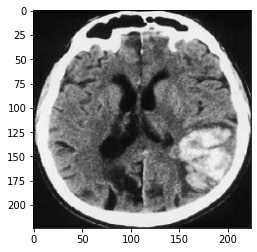

In [10]:
# 잘 나옴 이걸로 함.
plt.imshow(xtrain_1[2], cmap="gray")
plt.show()

In [11]:
# 라벨 데이터 리드
label_1=pd.read_csv("/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/100출혈, 100정상/labels.csv")
label_1

,id,hemorrhage
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
195,195,0
196,196,0
197,197,0
198,198,0


In [12]:
ytrain_1=list(label_1[" hemorrhage"])
# 1은 출혈, 0은 정상

In [13]:
ytrain_1[99]

1

In [14]:
ytrain_1[100]

0

# 이미지를 다른 이미지 파일과 합침

# 이미지 데이터 확인 0~99는 출혈, 이후 부터는 정상

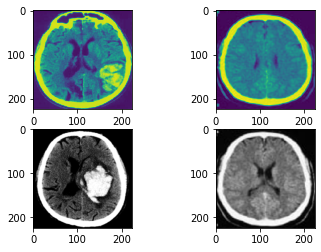

In [15]:
plt.subplot(2,2,1) # 수치적으로 점점 초록색 - 높은 값이 노랑색쪽 밝아진다. 
plt.imshow(xtrain_1[2]) 
plt.subplot(2,2,2) 
plt.imshow(xtrain_1[101]) # 흑백 plt.show()

plt.subplot(2,2,3) # 수치적으로 점점 초록색 - 높은 값이 노랑색쪽 밝아진다. 
plt.imshow(xtrain_1[4],cmap="gray") 
plt.subplot(2,2,4) 
plt.imshow(xtrain_1[104],cmap="gray") # 흑백 plt.show()

# 첫번째 종료 ======================================================================

# 두번째 시작 ==========================================================================

In [16]:
# 이건 출혈 상태임. 트레인 출혈 1 정상 0

imgs_4 = glob('/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/1000출혈, 1000정상/Train/Hemorrhage/hemorrhage_images/*.jpg')
len(imgs_4)

825

In [17]:
xtrain_4=[]
for i in range(len(imgs_4)):
    xtrain_4.append(np.array(load_img(imgs_4[i],target_size=(target_x,target_y),color_mode = "grayscale")))

In [18]:
np.shape(xtrain_4)

(825, 224, 224)

In [19]:
ytrain_4=[]
for i in range(len(imgs_4)):
    ytrain_4.insert(i,1) # i번째 인덱스에 1을 채움 825개 1

In [20]:
len(ytrain_4)

825

# 두번째 종료 ==========================================================================

# 세번째 시작 ======================================================================================

In [21]:
# 이건 정상 상태임. 트레인 출혈 1 정상 0

imgs_5 = glob('/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/1000출혈, 1000정상/Train/Normal/normal_images/*.jpg')
len(imgs_5)

1426

In [22]:
xtrain_5=[]
for i in range(len(imgs_5)):
    xtrain_5.append(np.array(load_img(imgs_5[i],target_size=(target_x,target_y),color_mode = "grayscale")))

In [23]:
np.shape(xtrain_5)

(1426, 224, 224)

In [24]:
ytrain_5=[]
for i in range(len(imgs_5)):
    ytrain_5.insert(i,0) # i번째 인덱스에 0을 채워줌 1426개 이건 정상이라 0

In [25]:
len(ytrain_5)


1426

# 세번째 종료 ==========================================================================

# 테스트_1 시작 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [26]:
# 이건 출혈 상태임. 테스트 출혈 1 정상 0

imgs_6 = glob('/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/1000출혈, 1000정상/Test/Hemorrhage/hemorrhage_images/*.jpg')
len(imgs_6)

125

In [27]:
xtest_1=[]
for i in range(len(imgs_6)):
    xtest_1.append(np.array(load_img(imgs_6[i],target_size=(target_x,target_y),color_mode = "grayscale")))

In [28]:
np.shape(xtest_1)

(125, 224, 224)

In [29]:
ytest_1=[]
for i in range(len(imgs_6)):
    ytest_1.insert(i,1) # i번째 인덱스에 1을 채워줌 이건 출혈이라 1 125개

In [30]:
len(ytest_1)

125

# 테스트_1 종료 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# 테스트_2 시작 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [31]:
# 이건 정상 상태임. 테스트 출혈 1 정상 0

imgs_7 = glob('/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/1000출혈, 1000정상/Test/Normal/normal_images/*.jpg')
len(imgs_7)

125

In [32]:
xtest_2=[]
for i in range(len(imgs_7)):
    xtest_2.append(np.array(load_img(imgs_7[i],target_size=(target_x,target_y),color_mode = "grayscale")))

In [33]:
ytest_2=[]
for i in range(len(imgs_7)):
    ytest_2.insert(i,0) # i번째 인덱스에 0을 채워줌 이건 정상이기 때문에 0 임.

In [34]:
len(ytest_2)

125

In [35]:
np.shape(xtest_2)

(125, 224, 224)

# 트레인, 테스트 데이터 분할 완료 
# 합치는 작업 시작

데이터 모양 확인

In [36]:
np.shape(xtrain_1) # 유지

(200, 224, 224)

In [37]:
# np.shape(xtrain_2)  # 삭제

In [38]:
# np.shape(xtrain_3) # 삭제

In [39]:
np.shape(xtrain_4)  # 유지

(825, 224, 224)

In [40]:
np.shape(xtrain_5) # 유지

(1426, 224, 224)

In [41]:
np.shape(xtest_1) # 유지

(125, 224, 224)

In [42]:
np.shape(xtest_2)  # 유지

(125, 224, 224)

데이터가 정상적으로 들어간것 확인

In [43]:
imsi_1=np.concatenate((xtrain_1,xtrain_4),axis=0) # xtrain_1과 _2 합침

In [44]:
# imsi_2=np.concatenate((imsi_1,xtrain_3),axis=0) # (xtrain과 _2 )+_3합침

In [45]:
# imsi_3=np.concatenate((imsi_2,xtrain_4),axis=0)

In [46]:
imsi_4=np.concatenate((imsi_1,xtrain_5),axis=0)

In [47]:
imsi_4.shape

(2451, 224, 224)

In [48]:
np.shape(imsi_4)

(2451, 224, 224)

In [49]:
xtrain_all=imsi_4

In [50]:
ytrain_all=ytrain_1+ytrain_4+ytrain_5

In [51]:
len(ytrain_all)

2451

In [52]:
np.shape(xtrain_all)

(2451, 224, 224)

데이터 합성 완료 약 2600여개의 데이터


In [53]:
xtest_all=np.concatenate((xtest_1,xtest_2),axis=0) 

In [54]:
xtest_all.shape

(250, 224, 224)

In [55]:
np.shape(xtest_1)

(125, 224, 224)

In [56]:
np.shape(xtest_2)

(125, 224, 224)

In [57]:
ytest_all=ytest_1+ytest_2

In [58]:
len(ytest_all)

250

테스트 데이터 합성 완료 약 250개

트레인, 밸리데이션 데이터 분할 약 0.1로 분할

In [59]:
xtrain_all_s, xval, ytrain_all_s, yval = train_test_split(xtrain_all, ytrain_all, test_size=0.1, shuffle=True, random_state=1208)


# 데이터 합성, 분할, 전처리 완료

# 모델링


In [60]:
xtrain=xtrain_all_s.reshape(xtrain_all_s.shape[0], target_x,target_y, 1).astype('float32')/255  # 255로 스케일링
xtest=xtest_all.reshape(xtest_all.shape[0], target_x,target_y, 1).astype('float32')/255
xval=xval.reshape(xval.shape[0], target_x,target_y, 1).astype('float32')/255
ytrain=np_utils.to_categorical(ytrain_all_s) # 카테고리컬 했음. 그래서 바이너리로 하지 않고, 카테고리컬로 쭈움 감
ytest=np_utils.to_categorical(ytest_all)
yval=np_utils.to_categorical(yval)



In [61]:
# 모델 저장 경로 설정
if not os.path.exists("/content/drive/MyDrive/파이널 프로젝트_내꺼/final_project_covmodel/"): # . 이 현재를 의미/ 현재 밑에
    os.mkdir("/content/drive/MyDrive/파이널 프로젝트_내꺼/final_project_covmodel/")

In [62]:
modelpath="/content/drive/MyDrive/파이널 프로젝트_내꺼/final_project_covmodel/{epoch:02d}-{val_loss:4f}.hdf5"

In [63]:
cp=ModelCheckpoint(filepath=modelpath, monitor="val_loss", save_best_only=True)  # 가장 좋은 모델만 저장해라.

In [64]:
esc=EarlyStopping(monitor="val_loss", patience=10)

In [65]:
# history=model.fit(xtrain, ytrain, validation_data=(xtest,ytest), epochs=200, batch_size=200, callbacks=[cp, esc] )
# validation_split=0.1
# validation_data=(xtest,ytest)

일반적인 형태로 모델을 생성하였으나, 속도가 너무 느렸기에, GPU를 사용하여 다시 작업을 함.

In [66]:
# GPU_ 사용 번호 확인
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


GPU를 통한 모델링 

In [67]:
with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Conv2D(256, kernel_size=(3,3),padding="same", input_shape=(target_x,target_y, 1), activation='relu'))
  # padding 밸리드= 패팅x, same 은 동일한 패딩을 계속하는 것임.
  model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
  # 위와 같은 형태의 한층을 추가했을 때는 모델의 정확도가 65% 정도 나왔으나, 삭제를 통해 정확도가 급상승

  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.20)) #20%는 제외  # 과대 적합 방지용 드롭아웃
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.20)) #20%는 제외 # 과대 적합 방지용 드롭아웃
  model.add(Dense(2, activation='softmax')) 
  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) 
  hist=model.fit(xtrain, ytrain, validation_data=(xval,yval), epochs=200, batch_size=3, callbacks=[cp, esc] )

  # history = model.fit_generator(xtrain, ytrain,epochs=20,validation_data=(xtest,ytest)) # ImageDataGenerator 이걸 사용해서 제네레이터로 생성된 경우 fit_generator 사용, 아니면 그냥 fit 사용임.

  # gpu 리소스 에러남. 이거 좀 설정해줘야 함. 전체 사이즈를 줄이던가 해야 함. -> 사이즈에서 문제가 생겨서 수정을 가했던 흔적 
  # 수정은 약 1차 650-> 512 -> 256 -> 128 -> 64 까지 사이즈 조정 
  # 1차로는 전체 파일의 숫자를 주리는 작업도 진행, 이후 3으로 되어있던, 컬러 형태를 1로 작업까지 진행해줌.

  

Epoch 1/200
735/735 [==============================] - 37s 38ms/step - loss: 0.5672 - accuracy: 0.7138 - val_loss: 0.2898 - val_accuracy: 0.9146
Epoch 2/200
735/735 [==============================] - 27s 36ms/step - loss: 0.2148 - accuracy: 0.9138 - val_loss: 0.1821 - val_accuracy: 0.9024
Epoch 3/200
735/735 [==============================] - 25s 34ms/step - loss: 0.1113 - accuracy: 0.9569 - val_loss: 0.2643 - val_accuracy: 0.9187
Epoch 4/200
735/735 [==============================] - 25s 34ms/step - loss: 0.0865 - accuracy: 0.9741 - val_loss: 0.2716 - val_accuracy: 0.9553
Epoch 5/200
735/735 [==============================] - 25s 34ms/step - loss: 0.0426 - accuracy: 0.9782 - val_loss: 0.2106 - val_accuracy: 0.9634
Epoch 6/200
735/735 [==============================] - 25s 34ms/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.3264 - val_accuracy: 0.9472
Epoch 7/200
735/735 [==============================] - 25s 34ms/step - loss: 0.0768 - accuracy: 0.9810 - val_loss: 0.7187 - val_ac

In [68]:
hist.history["accuracy"]

[0.7138321995735168,
 0.9138321876525879,
 0.956916093826294,
 0.9741496443748474,
 0.9782313108444214,
 0.9841269850730896,
 0.9809523820877075,
 0.9913831949234009,
 0.9909297227859497,
 0.9886621236801147,
 0.996371865272522,
 0.998185932636261]

In [69]:
# 가장 높은 정확도
best_score = max(hist.history['accuracy'])

print(best_score)

0.998185932636261


In [70]:
model.evaluate(xtest,ytest)  # loss와 정확도

8/8 [==============================] - 2s 182ms/step - loss: 2.0841 - accuracy: 0.8880


[2.0841336250305176, 0.8880000114440918]

In [71]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 256)     2560      
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 128)     295040    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0

In [72]:
with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Conv2D(256, kernel_size=(3,3),padding="same", input_shape=(target_x,target_y, 1), activation='relu'))
  # padding 밸리드= 패팅x, same 은 동일한 패딩을 계속하는 것임.
  model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  # 위와 같은 형태의 한층을 추가했을 때는 모델의 정확도가 65% 정도 나왔으나, 삭제를 통해 정확도가 급상승

  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.20)) #20%는 제외  # 과대 적합 방지용 드롭아웃
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(64, activation='relu'))

  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.20)) #20%는 제외 # 과대 적합 방지용 드롭아웃
  model.add(Dense(2, activation='softmax')) 
  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) 
  hist=model.fit(xtrain, ytrain, validation_data=(xval,yval), epochs=200, batch_size=1, callbacks=[cp, esc] )

  # history = model.fit_generator(xtrain, ytrain,epochs=20,validation_data=(xtest,ytest)) # ImageDataGenerator 이걸 사용해서 제네레이터로 생성된 경우 fit_generator 사용, 아니면 그냥 fit 사용임.

  # gpu 리소스 에러남. 이거 좀 설정해줘야 함. 전체 사이즈를 줄이던가 해야 함. -> 사이즈에서 문제가 생겨서 수정을 가했던 흔적 
  # 수정은 약 1차 650-> 512 -> 256 -> 128 -> 64 까지 사이즈 조정 
  # 1차로는 전체 파일의 숫자를 주리는 작업도 진행, 이후 3으로 되어있던, 컬러 형태를 1로 작업까지 진행해줌.

  

Epoch 1/200
2205/2205 [==============================] - 35s 15ms/step - loss: 0.7541 - accuracy: 0.6227 - val_loss: 0.6703 - val_accuracy: 0.6098
Epoch 2/200
2205/2205 [==============================] - 33s 15ms/step - loss: 0.6648 - accuracy: 0.6240 - val_loss: 0.6689 - val_accuracy: 0.6098
Epoch 3/200
2205/2205 [==============================] - 33s 15ms/step - loss: 0.6648 - accuracy: 0.6240 - val_loss: 0.6689 - val_accuracy: 0.6098
Epoch 4/200
2205/2205 [==============================] - 33s 15ms/step - loss: 0.6639 - accuracy: 0.6240 - val_loss: 0.6715 - val_accuracy: 0.6098
Epoch 5/200
2205/2205 [==============================] - 33s 15ms/step - loss: 0.6638 - accuracy: 0.6240 - val_loss: 0.6738 - val_accuracy: 0.6098
Epoch 6/200
2205/2205 [==============================] - 33s 15ms/step - loss: 0.6629 - accuracy: 0.6240 - val_loss: 0.6697 - val_accuracy: 0.6098
Epoch 7/200
2205/2205 [==============================] - 33s 15ms/step - loss: 0.6636 - accuracy: 0.6240 - val_loss: 0

In [73]:
hist.history["accuracy"]

[0.6226757168769836,
 0.6240362524986267,
 0.6240362524986267,
 0.6240362524986267,
 0.6240362524986267,
 0.6240362524986267,
 0.6240362524986267,
 0.6240362524986267,
 0.6240362524986267,
 0.6240362524986267,
 0.6240362524986267,
 0.6240362524986267]

In [74]:
# 가장 높은 정확도
best_score = max(hist.history['accuracy'])

print(best_score)

0.6240362524986267


In [75]:
model.evaluate(xtest,ytest)  # loss와 정확도

8/8 [==============================] - 1s 80ms/step - loss: 0.7284 - accuracy: 0.5000


[0.7284148931503296, 0.5]

In [76]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 256)     2560      
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 128)     295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 54, 54, 64)       

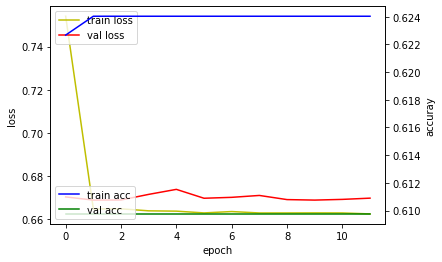

In [77]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx() # twinx() 축을 공유할때 사용하는 것임.
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

# 몇 에폭에서 멈추는 것이 좋을까? 하면서 잡는것도 좋음. 
# val_loss가 올라가면 모델이 과적합에 빠진다. -> 과적합에 빠진것으로 보임.



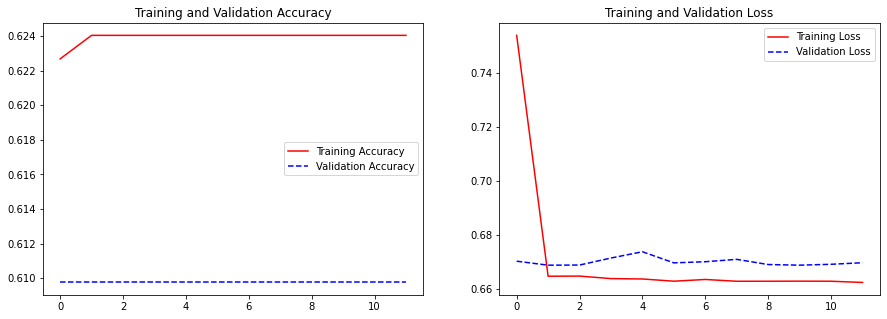

In [78]:
# Plot the training graph

def plot_training(history):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    axes[0].plot(epochs, acc, 'r-', label='Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label='Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc='best')

    axes[1].plot(epochs, loss, 'r-', label='Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label='Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc='best')
    
    plt.show()
    
plot_training(hist.history)

# 과대적합이 발견되어 과대적합을 줄이는 과정 진행

In [79]:
with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Conv2D(256, kernel_size=(3,3),padding="same", input_shape=(target_x,target_y, 1), activation='relu'))
  model.add(Dropout(0.20))
  # padding 밸리드= 패팅x, same 은 동일한 패딩을 계속하는 것임.
  model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.20))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
  # 위와 같은 형태의 한층을 추가했을 때는 모델의 정확도가 65% 정도 나왔으나, 삭제를 통해 정확도가 급상승

  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.20)) #20%는 제외  # 과대 적합 방지용 드롭아웃
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.50)) #20%는 제외 # 과대 적합 방지용 드롭아웃
  model.add(Dense(2, activation='softmax')) 
  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) 
  hist=model.fit(xtrain, ytrain, validation_data=(xval,yval), epochs=200, batch_size=3, callbacks=[cp, esc] )

  # history = model.fit_generator(xtrain, ytrain,epochs=20,validation_data=(xtest,ytest)) # ImageDataGenerator 이걸 사용해서 제네레이터로 생성된 경우 fit_generator 사용, 아니면 그냥 fit 사용임.

  # gpu 리소스 에러남. 이거 좀 설정해줘야 함. 전체 사이즈를 줄이던가 해야 함. -> 사이즈에서 문제가 생겨서 수정을 가했던 흔적 
  # 수정은 약 1차 650-> 512 -> 256 -> 128 -> 64 까지 사이즈 조정 
  # 1차로는 전체 파일의 숫자를 주리는 작업도 진행, 이후 3으로 되어있던, 컬러 형태를 1로 작업까지 진행해줌.

  

Epoch 1/200
735/735 [==============================] - 30s 41ms/step - loss: 0.5390 - accuracy: 0.7166 - val_loss: 0.5568 - val_accuracy: 0.7967
Epoch 2/200
735/735 [==============================] - 30s 40ms/step - loss: 0.2857 - accuracy: 0.8998 - val_loss: 0.1922 - val_accuracy: 0.9309
Epoch 3/200
735/735 [==============================] - 31s 42ms/step - loss: 0.1221 - accuracy: 0.9483 - val_loss: 0.1328 - val_accuracy: 0.9512
Epoch 4/200
735/735 [==============================] - 30s 40ms/step - loss: 0.1206 - accuracy: 0.9542 - val_loss: 0.1879 - val_accuracy: 0.9350
Epoch 5/200
735/735 [==============================] - 30s 40ms/step - loss: 0.1023 - accuracy: 0.9624 - val_loss: 0.3258 - val_accuracy: 0.9228
Epoch 6/200
735/735 [==============================] - 30s 40ms/step - loss: 0.0683 - accuracy: 0.9791 - val_loss: 0.1484 - val_accuracy: 0.9715
Epoch 7/200
735/735 [==============================] - 30s 40ms/step - loss: 0.0701 - accuracy: 0.9796 - val_loss: 0.2396 - val_ac

In [80]:
# 가장 높은 정확도
best_score = max(hist.history['accuracy'])

print(best_score)

0.9927437901496887


In [81]:
model.evaluate(xtest,ytest)  # loss와 정확도

8/8 [==============================] - 1s 80ms/step - loss: 1.6042 - accuracy: 0.9000


[1.6042197942733765, 0.8999999761581421]

In [82]:
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 256)     2560      
                                                                 
 dropout_4 (Dropout)         (None, 224, 224, 256)     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 222, 222, 128)     295040    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 111, 111, 128)     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 64)      73792     
                                                      

In [83]:
with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Conv2D(256, kernel_size=(3,3),padding="same", input_shape=(target_x,target_y, 1), activation='relu'))
  model.add(Dropout(0.20))
  # padding 밸리드= 패팅x, same 은 동일한 패딩을 계속하는 것임.
  # model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.20))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
  # 위와 같은 형태의 한층을 추가했을 때는 모델의 정확도가 65% 정도 나왔으나, 삭제를 통해 정확도가 급상승

  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.20)) #20%는 제외  # 과대 적합 방지용 드롭아웃
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  # model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.50)) #20%는 제외 # 과대 적합 방지용 드롭아웃
  model.add(Dense(2, activation='softmax')) 
  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) 
  hist=model.fit(xtrain, ytrain, validation_data=(xval,yval), epochs=200, batch_size=3, callbacks=[cp, esc] )

  # history = model.fit_generator(xtrain, ytrain,epochs=20,validation_data=(xtest,ytest)) # ImageDataGenerator 이걸 사용해서 제네레이터로 생성된 경우 fit_generator 사용, 아니면 그냥 fit 사용임.

  # gpu 리소스 에러남. 이거 좀 설정해줘야 함. 전체 사이즈를 줄이던가 해야 함. -> 사이즈에서 문제가 생겨서 수정을 가했던 흔적 
  # 수정은 약 1차 650-> 512 -> 256 -> 128 -> 64 까지 사이즈 조정 
  # 1차로는 전체 파일의 숫자를 주리는 작업도 진행, 이후 3으로 되어있던, 컬러 형태를 1로 작업까지 진행해줌.


Epoch 1/200
735/735 [==============================] - 46s 62ms/step - loss: 0.5151 - accuracy: 0.7551 - val_loss: 0.2376 - val_accuracy: 0.8618
Epoch 2/200
735/735 [==============================] - 45s 61ms/step - loss: 0.1818 - accuracy: 0.9188 - val_loss: 0.1707 - val_accuracy: 0.8902
Epoch 3/200
735/735 [==============================] - 45s 61ms/step - loss: 0.0853 - accuracy: 0.9587 - val_loss: 0.1727 - val_accuracy: 0.9268
Epoch 4/200
735/735 [==============================] - 45s 61ms/step - loss: 0.0629 - accuracy: 0.9678 - val_loss: 0.3112 - val_accuracy: 0.9228
Epoch 5/200
735/735 [==============================] - 45s 61ms/step - loss: 0.0513 - accuracy: 0.9773 - val_loss: 0.4458 - val_accuracy: 0.9106
Epoch 6/200
735/735 [==============================] - 45s 61ms/step - loss: 0.0667 - accuracy: 0.9732 - val_loss: 0.2602 - val_accuracy: 0.9187
Epoch 7/200
735/735 [==============================] - 45s 62ms/step - loss: 0.0467 - accuracy: 0.9819 - val_loss: 0.4135 - val_ac

과대적합이 조정되었다.

In [84]:
hist.history["accuracy"]

[0.7551020383834839,
 0.918820858001709,
 0.958730161190033,
 0.9678004384040833,
 0.9773242473602295,
 0.9732426404953003,
 0.9818593859672546,
 0.9786847829818726,
 0.9854875206947327,
 0.9827664494514465,
 0.9850339889526367,
 0.9859410524368286]

In [85]:
# 가장 높은 정확도
best_score = max(hist.history['accuracy'])

print(best_score)

0.9859410524368286


In [86]:
model.evaluate(xtest,ytest)  # loss와 정확도

8/8 [==============================] - 1s 94ms/step - loss: 1.6244 - accuracy: 0.9000


[1.62436842918396, 0.8999999761581421]

In [87]:
model.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 256)     2560      
                                                                 
 dropout_8 (Dropout)         (None, 224, 224, 256)     0         
                                                                 
 dropout_9 (Dropout)         (None, 224, 224, 256)     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 222, 222, 64)      147520    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 111, 111, 64)      0         
                                                      

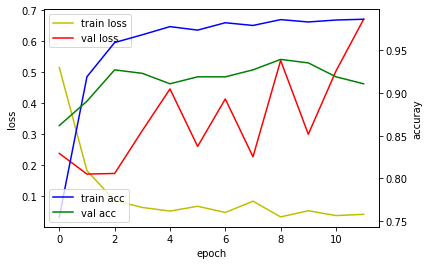

In [88]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx() # twinx() 축을 공유할때 사용하는 것임.
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

# 몇 에폭에서 멈추는 것이 좋을까? 하면서 잡는것도 좋음. 
# val_loss가 올라가면 모델이 과적합에 빠진다. -> 과적합에 빠진것으로 보임.



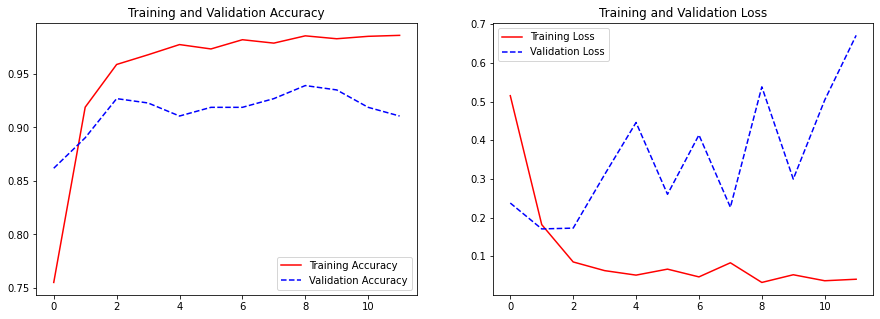

In [89]:
# Plot the training graph

def plot_training(history):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    axes[0].plot(epochs, acc, 'r-', label='Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label='Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc='best')

    axes[1].plot(epochs, loss, 'r-', label='Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label='Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc='best')
    
    plt.show()
    
plot_training(hist.history)